In [ ]:
""" 
Focus on motor kinemtics, including
- Plots overlaying FR traces and movements.
- regressions.
"""

##### Load neural and beh data (pending: cam)


In [1]:
from neuralmonkey.classes.session import Session
import matplotlib.pyplot as plt
from neuralmonkey.scripts.load_and_save_locally import load_and_preprocess_single_session
import neuralmonkey.utils.monkeylogic as mkl
from neuralmonkey.classes.session import load_session_helper, load_mult_session_helper

##### Single prims

In [2]:

### RULES
# good
# PREFIX_SAVE = "rules"
# DATE = "221020"
# dataset_beh_expt = "dirshapecolor1b"
# animal = "Pancho"

# good, but not many trials with "same beh"
# DATE = "221031"
# dataset_beh_expt = "dirshapecolor1h"
# animal = "Pancho"

# (no same beh)
# DATE = "221107"
# dataset_beh_expt = "dirfullvar1b"
# animal = "Pancho"


### SINGLE PRIMS
# DATE = "220715"
# dataset_beh_expt = "priminvar3"
# animal = "Pancho"

# DATE = "220716"
# dataset_beh_expt = "priminvar3"
# animal = "Pancho"

# DATE = "220717"
# dataset_beh_expt = "priminvar3"
# animal = "Pancho"

# motor kinematics (controlling for position of first touch)
PREFIX_SAVE = "primsingle"
DATE = "220719" 
dataset_beh_expt = None
animal = "Pancho"

# using mult prims in grid, still kineamtics
# PREFIX_SAVE = "sequence"
# DATE = "221107"
# dataset_beh_expt = "dirfullvar1b"
# animal = "Pancho"


# characters
# PREFIX_SAVE = "char"
# DATE = "220624" 
# dataset_beh_expt = None
# animal = "Pancho"

##### mult prims in grid
# PREFIX_SAVE = "sequence"
# DATE = "221107"
# dataset_beh_expt = "dirfullvar1b"
# animal = "Pancho"


##### Load session by hand, if debugging beh-neural mappingm

In [ ]:
from neuralmonkey.utils.monkeylogic import session_map_from_rec_to_ml2_ntrials_mapping

session_map_from_rec_to_ml2_ntrials_mapping(animal, DATE, 0)

beh_expt_list = [x[1] for x in sessions[2][DATE]]
beh_sess_list = [x[0] for x in sessions[2][DATE]]
beh_trial_map_list = [(1, 0), (1, 45)]
SN = Session(DATE, beh_expt_list, beh_sess_list, beh_trial_map_list,
       expt = "Pancho-220719-155517", animal=animal)

##### Load data 

Searching using this string:
/mnt/hopfield_data01/ltian/recordings/*Pancho*/*220719*/**
Found this many paths:
1
---
/mnt/hopfield_data01/ltian/recordings/Pancho/220719/Pancho-220719-155517
session:  0
Searching using this string:
/mnt/hopfield_data01/ltian/recordings/*Pancho*/*220719*/**
Found this many paths:
1
---
/mnt/hopfield_data01/ltian/recordings/Pancho/220719/Pancho-220719-155517
1
2
Beh Sessions hand netered (mapping: rec sess --> beh sess):  [2]
taking this beh session: 2
Loading these beh expts: ['priminvar3e']
Loading these beh sessions: [2]
Loading this neural session: 0
Searching using this string:
/mnt/hopfield_data01/ltian/recordings/*Pancho*/*220719*/**
Found this many paths:
1
---
/mnt/hopfield_data01/ltian/recordings/Pancho/220719/Pancho-220719-155517
{'filename_components_hyphened': ['Pancho', '220719', '155517'], 'basedirs': ['/mnt/hopfield_data01/ltian/recordings/Pancho', '/mnt/hopfield_data01/ltian/recordings/Pancho/220719'], 'basedirs_filenames': ['220719', 'Pa

** Loading tank data from local (previusly cached)
== Done
== Loading ml2 behavior
-- loaded presaved data: /gorilla1/animals/Pancho/220719/220719_160224_priminvar3e_Pancho_2.pkl
== Done
-- This is the lag for optimal xcorr of tdt and ml2 trial durations (+ means should look further back into beh trials):
0
-- This is the variation in (tdt - ml2) durations across trials. shodl be clsoe to 0
2.506703166797982
**
Animal:  Pancho
ExptSynapse:  Lucas512-220520-115835
Date:  220719
RecSession 0
RecPathBase:  /mnt/hopfield_data01/ltian/recordings
BehExpt:  ['priminvar3e']
BehExptSess:  [2]
final_dir_name:  Pancho-220719-155517
FAILED loading session: 220719 0
Possible that this one session maps to multiple beh sessions. try loading it automatically.
Searching using this string:
/mnt/hopfield_data01/ltian/recordings/*Pancho*/*220719*/**
Found this many paths:
1
---
/mnt/hopfield_data01/ltian/recordings/Pancho/220719/Pancho-220719-155517
1
2
Beh Sessions hand netered (mapping: rec sess --> beh

** Loading tank data from local (previusly cached)
== Done
== Loading ml2 behavior
-- loaded presaved data: /gorilla1/animals/Pancho/220719/220719_155256_priminvar3e_Pancho_1.pkl
-- loaded presaved data: /gorilla1/animals/Pancho/220719/220719_160224_priminvar3e_Pancho_2.pkl
== Done
-- This is the lag for optimal xcorr of tdt and ml2 trial durations (+ means should look further back into beh trials):
0
-- This is the variation in (tdt - ml2) durations across trials. shodl be clsoe to 0
2.6133504467270974e-05
GREAT!! mapping is correct. Doing nothing
== Loading spike times
** Loading spike data from local (previusly cached)
== Done
== Trying to load events data
Loading this events (pd) locally to:  /gorilla1/neural_preprocess/recordings/Pancho/220719/Pancho-220719-155517/events_photodiode.pkl
== Done
Generated self._MapperTrialcode2TrialToTrial!
Saved all bad site to self.SitesErrorSpikeDat
** Loading datall from local (previusly cached)
Done loading!
DOING: datall_cleanup_add_things
Gen

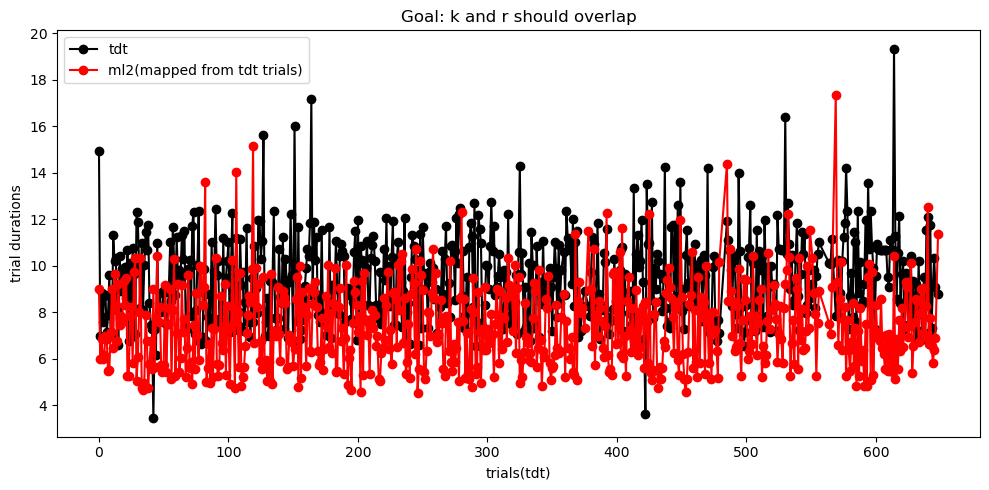

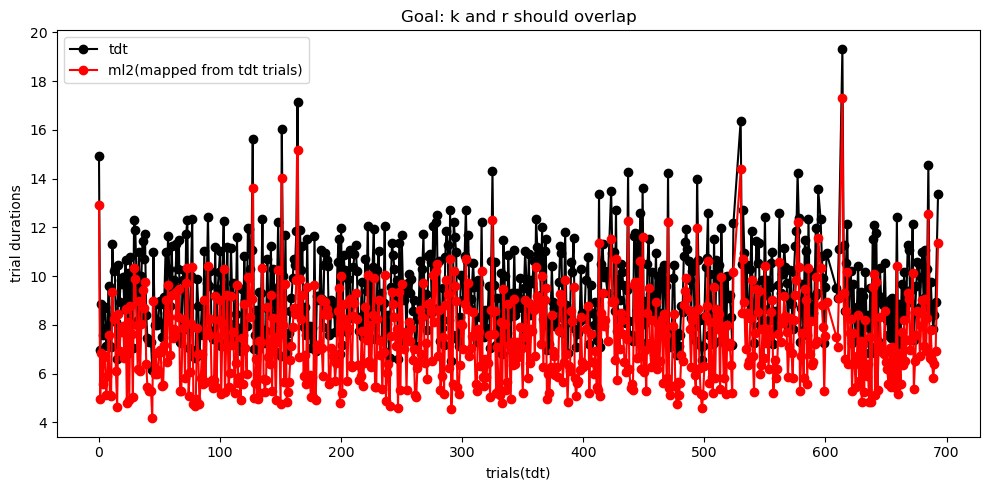

In [3]:
# %matplotlib inline
# to help debug if times are misaligned.

SAVENAME = "230208_motor_kinematics"

# MS = load_mult_session_helper(DATE, animal, dataset_beh_expt)
animal = "Pancho"
MS = load_mult_session_helper(DATE, animal)
    
# [OPTIONAL] import dataset
# for sn in MS.SessionsList:
#     sn.datasetbeh_load_helper(dataset_beh_expt)
for sn in MS.SessionsList:
    sn.datasetbeh_load_helper(None)


# SAVEDIR = f"/data2/analyses/recordings/NOTEBOOKS/220713_prims_state_space/{animal}/{DATE}"
if PREFIX_SAVE is None:
    SAVEDIR = f"/gorilla1/analyses/recordings/NOTEBOOKS/{SAVENAME}/{animal}/{DATE}"
else:
    SAVEDIR = f"/gorilla1/analyses/recordings/NOTEBOOKS/{SAVENAME}/{animal}/{DATE}_{PREFIX_SAVE}"
    

import os
print(SAVEDIR)
os.makedirs(SAVEDIR, exist_ok=True)

#### Print summaries of datasets

In [ ]:
# print summary:
for i, sn in enumerate(MS.SessionsList):
    print("\n====== SESSION NUM: ", i)
    sn.sitegetter_print_summary_nunits_by_region()


##### TODO

1. Reextract smoothed FR using shorter duration kernel
2. Pick out the most modulated M1 unit
3. Plot example trials -- overlay smoothed fr on trial
4. Plot average activity for a shape, aligned to movement
5. Compare to acceleration.


##### EXtract things

In [ ]:
sn = MS.SessionsList[0]
D = sn.Datasetbeh


In [ ]:
ind = 100
region = "M1"
trial = sn.get_trials_list(True, True)[ind]
# site = sn.sitegetter_map_region_to_sites(region)[ind]
sites = sn.sitegetter_map_region_to_sites(region)

sn.plotwrapper_raster_oneetrial_multsites(trial, sites[:20])


In [ ]:
site = 13
trials = sn.get_trials_list(True, True)[300:320]
sn.plotwrapper_raster_multrials_onesite(trials, site);

In [ ]:
D.behclass_preprocess_wrapper()

In [ ]:
# Get all trials with a given shape
list_shapes = []
for i in range(len(D.Dat)):
    shapes = D.taskclass_shapes_extract(i)
    assert len(shapes)==1
    list_shapes.append(shapes[0])
list_shapes_set = list(set(list_shapes))

def _plot_trials(trials, site, overlay_strokes_on_rasters = False):
#     # Plot all trials
#     sn.plotwrapper_raster_multrials_onesite(trials, site, alignto="on_strokeidx_0");
    D = sn.Datasetbeh
    inds = [sn.datasetbeh_trial_to_datidx(t) for t in trials]
    
    fig1, axes = plt.subplots(2,2, sharex=True, figsize=(15, 6))

    ax=axes.flatten()[1]
    sn.plot_raster_trials(ax, trials, site, alignto="on_strokeidx_0", xmin=-0.5, xmax=1.9, alpha_raster=0.7,
                         overlay_trial_events=False, overlay_strokes=overlay_strokes_on_rasters)

    ax = axes.flatten()[0]
    sn.plotwrapper_smoothed_multtrials_multsites_timewindow([site], trials, plot_summary=True, ax=ax,
                                                            alignto="on_strokeidx_0", pre_dur=-0.5, post_dur=1.9)

    # Overlay the velocities
    # strokes = D.Dat
    # D.plotMultTrialsTimecourse(inds, plotver="vel", align_to="first_touch")
    list_strokes = D.Dat.iloc[inds]["strokes_beh"].tolist()
    plotver="speed"
    ax = axes.flatten()[3]
    for i, strokes in enumerate(list_strokes):
        if i>0:
            nolegend=True
        else:
            nolegend=False
        D.plot_strokes_timecourse_speed_vel(strokes, ax, plotver, nolegend=nolegend, alpha=0.15)

    plotver="vel"
    ax = axes.flatten()[2]
    for i, strokes in enumerate(list_strokes):
        if i>0:
            nolegend=True
        else:
            nolegend=False
        D.plot_strokes_timecourse_speed_vel(strokes, ax, plotver, nolegend=nolegend, alpha=0.15)

    if False:
        # cant, becuase share axes
        ax = axes.flatten()[4]
        nmax = 10
        for i, t in enumerate(trials):
            if i<nmax:
                sn.plot_final_drawing(ax, t, strokes_only=True)
    if False:
        # Plot velocity timecourse
        D.plotMultTrialsTimecourse(inds, plotver="vel", align_to="first_touch")
        
    t = trials[0]
    fig2, ax = sn.datasetbeh_plot_example_drawing(t);
    
    return fig1, fig2
    
def _plot_shape_motor(shape, site):
    
    # get shapes for all trials
    
    # Pull out trials for a shape
    inds = [i for i, sh in enumerate(list_shapes) if sh==SHAPE]
    
    # Plot behavior
    figbeh, axes, _ = D.plotMultTrials(inds, nrand=10)
    figtask = D.plotSingleTrial(inds[0], things_to_plot=["task"])

    # convert these inds to nerual inds
    trials = [sn.datasetbeh_datidx_to_trial(i) for i in inds]
        
    fig1, fig2 = _plot_trials(trials, site)
    
    return figbeh, figtask, fig1, fig2


In [ ]:
list_regions = ["M1_l", "preSMA_a"]
sites = sn.sitegetter_all(list_regions)
list_shapes_set = ["squiggle3-3-2-0"]
# Print/tablue the shapes
if False:
    from pythonlib.tools.listtools import tabulate_list
    display(tabulate_list(list_shapes))

for SHAPE in list_shapes_set:
    sdir = f"{SAVEDIR}/each_shape_rasters_velocity/{SHAPE}"
    os.makedirs(sdir, exist_ok=True)
    print("Saving at:", sdir)
    for i, site in enumerate(sites):
    #     SHAPE = "line-9-4-0"
        suffsite = sn.sitegetter_summarytext(site)
        figbeh, figtask, fig1, fig2 = _plot_shape_motor(SHAPE, site)
        if i==0:
            # then save the drawing plots, just for one site, since they are same across sites.    
            figbeh.savefig(f"{sdir}/{suffsite}-shape_{SHAPE}-drawingsall.pdf")
            figtask.savefig(f"{sdir}/{suffsite}-shape_{SHAPE}-task.pdf")
            fig2.savefig(f"{sdir}/{suffsite}-shape_{SHAPE}_drawing.pdf")
        fig1.savefig(f"{sdir}/{suffsite}-shape_{SHAPE}.pdf")
        plt.close("all")


In [ ]:
trial = 250
_plot_trials([trial])

In [ ]:
# for each shape, plot raster, smoothed Fr, and velocity profiles



In [ ]:
np.arange(-0.15, 0.15, 0.05)

##### Entire pipeline to get regression coefficients

In [4]:
SAVEDIR = '/gorilla1/analyses/recordings/NOTEBOOKS/230208_motor_kinematics/Pancho/220719_primsingle'

In [7]:
if False:
    # pull out trials that are characters
    inds_dat = D.Dat[D.Dat["task_kind"]=="character"].index.tolist()
    trials_force = [sn.datasetbeh_datidx_to_trial(i) for i in inds_dat]
    print("Getting this many trials:", len(trials_force))
else:
    trials_force = None # ignore forced trials.

In [5]:
import numpy as np
import pandas as pd
import numpy as np
import os
import seaborn as sns
from pythonlib.tools.stroketools import strokes_bin_velocity_wrapper
from pythonlib.tools.pandastools import applyFunctionToAllRows
sdir = f"{SAVEDIR}/moment_by_moment_fr_regressions"
os.makedirs(sdir, exist_ok=True)


In [8]:
import pingouin as pg
import pandas as pd
binsize=0.050
DEBUG = False
MAX_N_TRIALS = 200 
list_lags = np.arange(-0.3, 0.35, 0.05)
# list_lags = [-0.3, -0.25, -0.2, 0.15, 0.2, 0.25]
sn = MS.SessionsList[0]
D = sn.Datasetbeh

for lag_fr_rel_beh in list_lags:
    lag_fr_rel_beh = np.round(lag_fr_rel_beh * 1000)/1000 # clean up precision
    print(lag_fr_rel_beh)
#     lag_fr_rel_beh = -0.04 # seconds, neural activity relative to beh. negative means neural is before.
    
    if DEBUG:
        # sites = sn.sitegetter_map_region_to_sites("M1_l")
        sites = sn.sitegetter_map_region_to_sites("M1_m")[:10]
        trials = sn.get_trials_list(True, True, True)[:10]
    else:
        sites = sn.sitegetter_all()
        trials = sn.get_trials_list(True, True, True)[:MAX_N_TRIALS]
    
    if trials_force is not None:
        trials = trials_force
        print("Forcing trials to (this many): ", len(trials))
    sqrt_norm = True
    PLOT_SCATTERS = False

    # Collect velocity at each timepoint
    fs = D.get_sample_rate_alltrials()
    list_out = []
    for trial in trials:
        print("trial index", trial, "out of this many", len(trials))
        strokes = sn.strokes_extract(trial, True)
        out = strokes_bin_velocity_wrapper(strokes, fs, binsize, return_as_dataframe=True)

        # Collect fr at those timepoints
        for s in sites:
            this = sn.smoothedfr_extract([trial], [s])
            assert len(this)==1
            fr = this["fr"].tolist()[0]        
            if sqrt_norm:
                fr = fr**0.5
            times = this["times"].tolist()[0] 

            def F(x):
                t1 = x["t1_bin_inclusive"] + lag_fr_rel_beh
                t2 = x["t2_bin_exclusive"] + lag_fr_rel_beh
                inds = (times>=t1) & (times<t2)
                return np.mean(fr[inds])
            out = applyFunctionToAllRows(out, F, f"fr_site_{s}")

        list_out.append(out)


    dat = pd.concat(list_out).reset_index(drop=True)

    # for each site, plot its scatter vs variables
    if PLOT_SCATTERS:
        for s in sites:
            fig = sns.pairplot(data=dat, x_vars=["x", "y", "angle", "length"], y_vars=[f"fr_site_{s}"], 
                               markers="x", kind="kde")
            fig.savefig(f"{sdir}/site_{sn.sitegetter_summarytext(s)}.pdf")



    # Collect regression coefficients
    dat_coeffs = []
    for s in sites:
        X = np.c_[dat["x"].values.T, dat["y"].values.T] # (N,2)
        y = dat[f"fr_site_{s}"]
        res = pg.linear_regression(X, y)
        coeff_x = res[res["names"]=="x1"]["coef"].item()
        coeff_y = res[res["names"]=="x2"]["coef"].item()
        r2 = res.iloc[0]["r2"]
        dat_coeffs.append({
            "site":s,
            "coeff_x":coeff_x,
            "coeff_y":coeff_y,
            "r2":r2
        })


    df_coeffs = pd.DataFrame(dat_coeffs)
    print("Plotting...")
    fig = sns.catplot(data=df_coeffs, x="site", y="coeff_x")
    fig.savefig(f"{sdir}/regression_coeffs_xvel-lag_fr_rel_beh_{lag_fr_rel_beh}.pdf")
    fig = sns.catplot(data=df_coeffs, x="site", y="coeff_y")
    fig.savefig(f"{sdir}/regression_coeffs_yvel-lag_fr_rel_beh_{lag_fr_rel_beh}.pdf")            
    fig = sns.catplot(data=df_coeffs, x="site", y="r2")
    fig.savefig(f"{sdir}/regression_coeffs_r2-lag_fr_rel_beh_{lag_fr_rel_beh}.pdf")            

    # save everything
    df_coeffs.to_pickle(f"{sdir}/dfcoeff-lag_fr_rel_beh_{lag_fr_rel_beh}.pkl")
    dat.to_pickle(f"{sdir}/dfraw-lag_fr_rel_beh_{lag_fr_rel_beh}.pkl")

    plt.close("all")

-0.3
get_trials_list - only_if_in_dataset
trial index 0 out of this many 200
trial index 1 out of this many 200
trial index 2 out of this many 200
trial index 3 out of this many 200
trial index 4 out of this many 200
trial index 5 out of this many 200
trial index 6 out of this many 200
trial index 7 out of this many 200
trial index 8 out of this many 200
trial index 9 out of this many 200
trial index 10 out of this many 200
trial index 11 out of this many 200
trial index 12 out of this many 200
trial index 13 out of this many 200
trial index 14 out of this many 200
trial index 15 out of this many 200
trial index 16 out of this many 200
trial index 17 out of this many 200
trial index 18 out of this many 200
trial index 19 out of this many 200
trial index 20 out of this many 200
trial index 21 out of this many 200
trial index 22 out of this many 200
trial index 23 out of this many 200
trial index 24 out of this many 200
trial index 25 out of this many 200
trial index 26 out of this many 

trial index 23 out of this many 200
trial index 24 out of this many 200
trial index 25 out of this many 200
trial index 26 out of this many 200
trial index 27 out of this many 200
trial index 28 out of this many 200
trial index 29 out of this many 200
trial index 30 out of this many 200
trial index 31 out of this many 200
trial index 32 out of this many 200
trial index 33 out of this many 200
trial index 34 out of this many 200
trial index 35 out of this many 200
trial index 36 out of this many 200
trial index 37 out of this many 200
trial index 38 out of this many 200
trial index 39 out of this many 200
trial index 40 out of this many 200
trial index 41 out of this many 200
trial index 43 out of this many 200
trial index 45 out of this many 200
trial index 46 out of this many 200
trial index 47 out of this many 200
trial index 48 out of this many 200
trial index 49 out of this many 200
trial index 50 out of this many 200
trial index 51 out of this many 200
trial index 52 out of this m

trial index 49 out of this many 200
trial index 50 out of this many 200
trial index 51 out of this many 200
trial index 52 out of this many 200
trial index 53 out of this many 200
trial index 54 out of this many 200
trial index 55 out of this many 200
trial index 56 out of this many 200
trial index 57 out of this many 200
trial index 58 out of this many 200
trial index 59 out of this many 200
trial index 60 out of this many 200
trial index 61 out of this many 200
trial index 62 out of this many 200
trial index 63 out of this many 200
trial index 64 out of this many 200
trial index 65 out of this many 200
trial index 66 out of this many 200
trial index 67 out of this many 200
trial index 68 out of this many 200
trial index 69 out of this many 200
trial index 70 out of this many 200
trial index 71 out of this many 200
trial index 72 out of this many 200
trial index 73 out of this many 200
trial index 74 out of this many 200
trial index 75 out of this many 200
trial index 76 out of this m

trial index 73 out of this many 200
trial index 74 out of this many 200
trial index 75 out of this many 200
trial index 76 out of this many 200
trial index 77 out of this many 200
trial index 78 out of this many 200
trial index 79 out of this many 200
trial index 80 out of this many 200
trial index 81 out of this many 200
trial index 82 out of this many 200
trial index 83 out of this many 200
trial index 84 out of this many 200
trial index 85 out of this many 200
trial index 86 out of this many 200
trial index 87 out of this many 200
trial index 88 out of this many 200
trial index 89 out of this many 200
trial index 90 out of this many 200
trial index 91 out of this many 200
trial index 92 out of this many 200
trial index 93 out of this many 200
trial index 94 out of this many 200
trial index 95 out of this many 200
trial index 96 out of this many 200
trial index 97 out of this many 200
trial index 98 out of this many 200
trial index 99 out of this many 200
trial index 100 out of this 

trial index 97 out of this many 200
trial index 98 out of this many 200
trial index 99 out of this many 200
trial index 100 out of this many 200
trial index 101 out of this many 200
trial index 102 out of this many 200
trial index 103 out of this many 200
trial index 104 out of this many 200
trial index 105 out of this many 200
trial index 106 out of this many 200
trial index 107 out of this many 200
trial index 108 out of this many 200
trial index 109 out of this many 200
trial index 110 out of this many 200
trial index 111 out of this many 200
trial index 112 out of this many 200
trial index 113 out of this many 200
trial index 114 out of this many 200
trial index 115 out of this many 200
trial index 116 out of this many 200
trial index 117 out of this many 200
trial index 118 out of this many 200
trial index 119 out of this many 200
trial index 120 out of this many 200
trial index 121 out of this many 200
trial index 122 out of this many 200
trial index 123 out of this many 200
tria

trial index 120 out of this many 200
trial index 121 out of this many 200
trial index 122 out of this many 200
trial index 123 out of this many 200
trial index 124 out of this many 200
trial index 125 out of this many 200
trial index 126 out of this many 200
trial index 127 out of this many 200
trial index 128 out of this many 200
trial index 129 out of this many 200
trial index 130 out of this many 200
trial index 131 out of this many 200
trial index 132 out of this many 200
trial index 133 out of this many 200
trial index 134 out of this many 200
trial index 135 out of this many 200
trial index 136 out of this many 200
trial index 137 out of this many 200
trial index 138 out of this many 200
trial index 139 out of this many 200
trial index 140 out of this many 200
trial index 141 out of this many 200
trial index 142 out of this many 200
trial index 143 out of this many 200
trial index 144 out of this many 200
trial index 145 out of this many 200
trial index 146 out of this many 200
t

trial index 143 out of this many 200
trial index 144 out of this many 200
trial index 145 out of this many 200
trial index 146 out of this many 200
trial index 147 out of this many 200
trial index 148 out of this many 200
trial index 149 out of this many 200
trial index 150 out of this many 200
trial index 151 out of this many 200
trial index 152 out of this many 200
trial index 153 out of this many 200
trial index 154 out of this many 200
trial index 155 out of this many 200
trial index 156 out of this many 200
trial index 157 out of this many 200
trial index 158 out of this many 200
trial index 159 out of this many 200
trial index 160 out of this many 200
trial index 161 out of this many 200
trial index 162 out of this many 200
trial index 163 out of this many 200
trial index 164 out of this many 200
trial index 165 out of this many 200
trial index 166 out of this many 200
trial index 167 out of this many 200
trial index 168 out of this many 200
trial index 169 out of this many 200
t

trial index 166 out of this many 200
trial index 167 out of this many 200
trial index 168 out of this many 200
trial index 169 out of this many 200
trial index 170 out of this many 200
trial index 171 out of this many 200
trial index 172 out of this many 200
trial index 173 out of this many 200
trial index 174 out of this many 200
trial index 175 out of this many 200
trial index 176 out of this many 200
trial index 177 out of this many 200
trial index 178 out of this many 200
trial index 179 out of this many 200
trial index 180 out of this many 200
trial index 181 out of this many 200
trial index 182 out of this many 200
trial index 183 out of this many 200
trial index 184 out of this many 200
trial index 185 out of this many 200
trial index 186 out of this many 200
trial index 187 out of this many 200
trial index 188 out of this many 200
trial index 189 out of this many 200
trial index 190 out of this many 200
trial index 191 out of this many 200
trial index 192 out of this many 200
t

trial index 189 out of this many 200
trial index 190 out of this many 200
trial index 191 out of this many 200
trial index 192 out of this many 200
trial index 193 out of this many 200
trial index 194 out of this many 200
trial index 195 out of this many 200
trial index 196 out of this many 200
trial index 197 out of this many 200
trial index 198 out of this many 200
trial index 199 out of this many 200
trial index 200 out of this many 200
trial index 201 out of this many 200
Plotting...
0.15
get_trials_list - only_if_in_dataset
trial index 0 out of this many 200
trial index 1 out of this many 200
trial index 2 out of this many 200
trial index 3 out of this many 200
trial index 4 out of this many 200
trial index 5 out of this many 200
trial index 6 out of this many 200
trial index 7 out of this many 200
trial index 8 out of this many 200
trial index 9 out of this many 200
trial index 10 out of this many 200
trial index 11 out of this many 200
trial index 12 out of this many 200
trial i

trial index 9 out of this many 200
trial index 10 out of this many 200
trial index 11 out of this many 200
trial index 12 out of this many 200
trial index 13 out of this many 200
trial index 14 out of this many 200
trial index 15 out of this many 200
trial index 16 out of this many 200
trial index 17 out of this many 200
trial index 18 out of this many 200
trial index 19 out of this many 200
trial index 20 out of this many 200
trial index 21 out of this many 200
trial index 22 out of this many 200
trial index 23 out of this many 200
trial index 24 out of this many 200
trial index 25 out of this many 200
trial index 26 out of this many 200
trial index 27 out of this many 200
trial index 28 out of this many 200
trial index 29 out of this many 200
trial index 30 out of this many 200
trial index 31 out of this many 200
trial index 32 out of this many 200
trial index 33 out of this many 200
trial index 34 out of this many 200
trial index 35 out of this many 200
trial index 36 out of this ma

trial index 33 out of this many 200
trial index 34 out of this many 200
trial index 35 out of this many 200
trial index 36 out of this many 200
trial index 37 out of this many 200
trial index 38 out of this many 200
trial index 39 out of this many 200
trial index 40 out of this many 200
trial index 41 out of this many 200
trial index 43 out of this many 200
trial index 45 out of this many 200
trial index 46 out of this many 200
trial index 47 out of this many 200
trial index 48 out of this many 200
trial index 49 out of this many 200
trial index 50 out of this many 200
trial index 51 out of this many 200
trial index 52 out of this many 200
trial index 53 out of this many 200
trial index 54 out of this many 200
trial index 55 out of this many 200
trial index 56 out of this many 200
trial index 57 out of this many 200
trial index 58 out of this many 200
trial index 59 out of this many 200
trial index 60 out of this many 200
trial index 61 out of this many 200
trial index 62 out of this m

trial index 59 out of this many 200
trial index 60 out of this many 200
trial index 61 out of this many 200
trial index 62 out of this many 200
trial index 63 out of this many 200
trial index 64 out of this many 200
trial index 65 out of this many 200
trial index 66 out of this many 200
trial index 67 out of this many 200
trial index 68 out of this many 200
trial index 69 out of this many 200
trial index 70 out of this many 200
trial index 71 out of this many 200
trial index 72 out of this many 200
trial index 73 out of this many 200
trial index 74 out of this many 200
trial index 75 out of this many 200
trial index 76 out of this many 200
trial index 77 out of this many 200
trial index 78 out of this many 200
trial index 79 out of this many 200
trial index 80 out of this many 200
trial index 81 out of this many 200
trial index 82 out of this many 200
trial index 83 out of this many 200
trial index 84 out of this many 200
trial index 85 out of this many 200
trial index 86 out of this m

##### Load those saved data above, and concat and plot

In [36]:
list_lags = np.arange(-0.3, 0.35, 0.05)
REGION_COMBINED = True
sdir = f"{SAVEDIR}/moment_by_moment_fr_regressions"


In [37]:

list_df = []
for lag_fr_rel_beh in list_lags:
    lag_fr_rel_beh = np.round(lag_fr_rel_beh * 1000)/1000 # clean up precision
#     if lag_fr_rel_beh==-0.0:
#         lag_fr_rel_beh=0.0
    fname = f"{sdir}/dfcoeff-lag_fr_rel_beh_{lag_fr_rel_beh}.pkl"
    try:
        dfthis = pd.read_pickle(fname)
        dfthis["lag_fr_rel_beh"] = lag_fr_rel_beh
        list_df.append(dfthis)
        print("Found this lag:", lag_fr_rel_beh)
    except FileNotFoundError as err:
        print(fname)
        print("skipped:", lag_fr_rel_beh)
        
df_coeff_all = pd.concat(list_df).reset_index(drop=True)

# Assign brain areas
def F(x):
    return sn.sitegetter_map_site_to_region(x["site"], region_combined=REGION_COMBINED)
df_coeff_all = applyFunctionToAllRows(df_coeff_all, F, "region")

sdir = f"{SAVEDIR}/xyvel_regressions_summary_across_lags-region_combined_{REGION_COMBINED}"
os.makedirs(sdir, exist_ok=True)


Found this lag: -0.3
Found this lag: -0.25
Found this lag: -0.2
Found this lag: -0.15
Found this lag: -0.1
Found this lag: -0.05
Found this lag: -0.0
Found this lag: 0.05
Found this lag: 0.1
Found this lag: 0.15
Found this lag: 0.2
Found this lag: 0.25
Found this lag: 0.3


In [38]:
# Get absolute values of coefficients
for var in ["coeff_x", "coeff_y"]:
    def F(x):
        return np.abs(x[var])
    df_coeff_all = applyFunctionToAllRows(df_coeff_all, F, f"{var}_ABS")

# get mean coeef
def F(x):
    return (x["coeff_x_ABS"] + x["coeff_y_ABS"])/2
df_coeff_all = applyFunctionToAllRows(df_coeff_all, F, "coeff_x_y_ABS_mean")


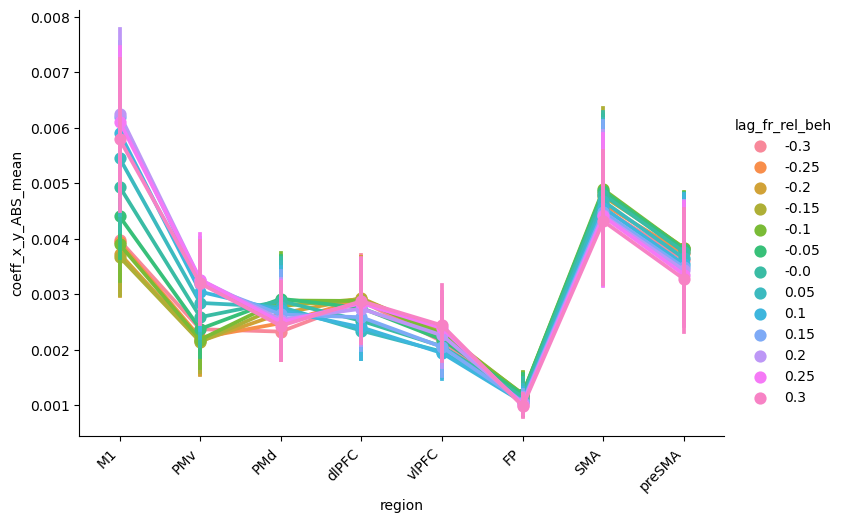

In [39]:
from pythonlib.tools.snstools import rotateLabel

fig = sns.catplot(data=df_coeff_all, x="region", y="coeff_x_y_ABS_mean", hue="lag_fr_rel_beh", kind="point", aspect=1.5)
rotateLabel(fig)

In [ ]:
# plot
from pythonlib.tools.snstools import rotateLabel

fig = sns.catplot(data=df_coeff_all, x="region", y="r2", hue="lag_fr_rel_beh", kind="point", aspect=1.5)
rotateLabel(fig)

In [ ]:
regions_plot = ["M1_m", "M1_l", "PMv_m", "SMA_a", "dlPFC_a", "preSMA_p", "FP_p"]
regions_plot = ["M1_m", "M1_l", "PMv_m", "SMA_a", "dlPFC_a", "preSMA_p"]
dfthis = df_coeff_all[df_coeff_all["region"].isin(regions_plot)]
fig = sns.catplot(data=dfthis, x="lag_fr_rel_beh", y="r2", hue="region", kind="point")


In [ ]:
regions_plot = ["M1_m", "M1_l", "PMv_m", "SMA_a", "dlPFC_a", "preSMA_p", "FP_p"]
regions_plot = ["M1_m", "M1_l", "PMv_m", "SMA_a", "dlPFC_a", "preSMA_p"]
dfthis = df_coeff_all[df_coeff_all["region"].isin(regions_plot)]
fig = sns.catplot(data=dfthis, x="lag_fr_rel_beh", y="r2", hue="region", kind="point")


In [ ]:
# regions_plot = ["M1_m", "M1_l", "PMv_m", "SMA_a", "dlPFC_a", "preSMA_p", "FP_p"]
dfthis = df_coeff_all
fig = sns.catplot(data=dfthis, x="lag_fr_rel_beh", y="coeff_x_y_ABS_mean", hue="region", kind="point")


In [ ]:
regions_plot = ["M1_m", "M1_l", "PMv_m", "SMA_a", "dlPFC_a", "preSMA_p", "FP_p"]
# regions_plot = ["M1", "PMd", "SMA", "preSMA"]
dfthis = df_coeff_all[df_coeff_all["region"].isin(regions_plot)]
fig = sns.catplot(data=dfthis, x="lag_fr_rel_beh", y="r2", hue="region", kind="point", ci=68)


In [ ]:
# regions_plot = ["M1_m", "M1_l", "PMv_m", "SMA_a", "dlPFC_a", "preSMA_p", "FP_p"]
regions_plot = ["M1", "PMd", "SMA", "preSMA"]
lag_min = -0.2
lag_max = 0.2
lag_min = -0.5
lag_max = 0.1
dfthis = df_coeff_all[df_coeff_all["region"].isin(regions_plot)]
dfthis = dfthis[(dfthis["lag_fr_rel_beh"]>=lag_min) & (dfthis["lag_fr_rel_beh"]<=lag_max)]
fig = sns.catplot(data=dfthis, x="lag_fr_rel_beh", y="r2", hue="region", kind="point", ci=68)


In [ ]:
dfthis = df_coeff_all
fig = sns.catplot(data=dfthis, col="lag_fr_rel_beh", col_wrap=2, x="region", y="coeff_x")
rotateLabel(fig)

##### Final (simple) summary plot

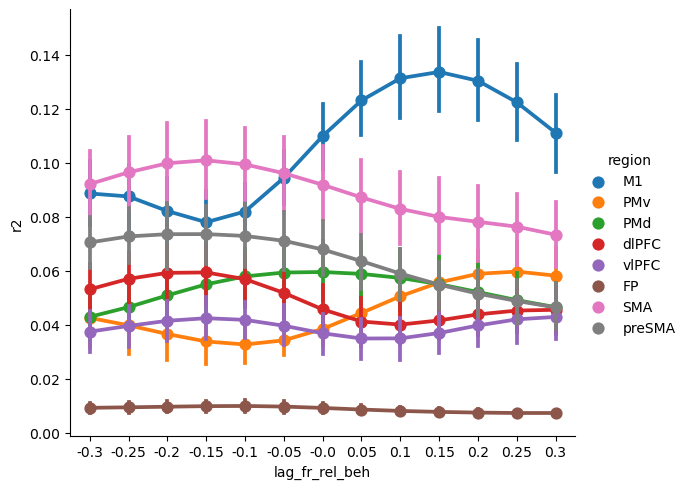

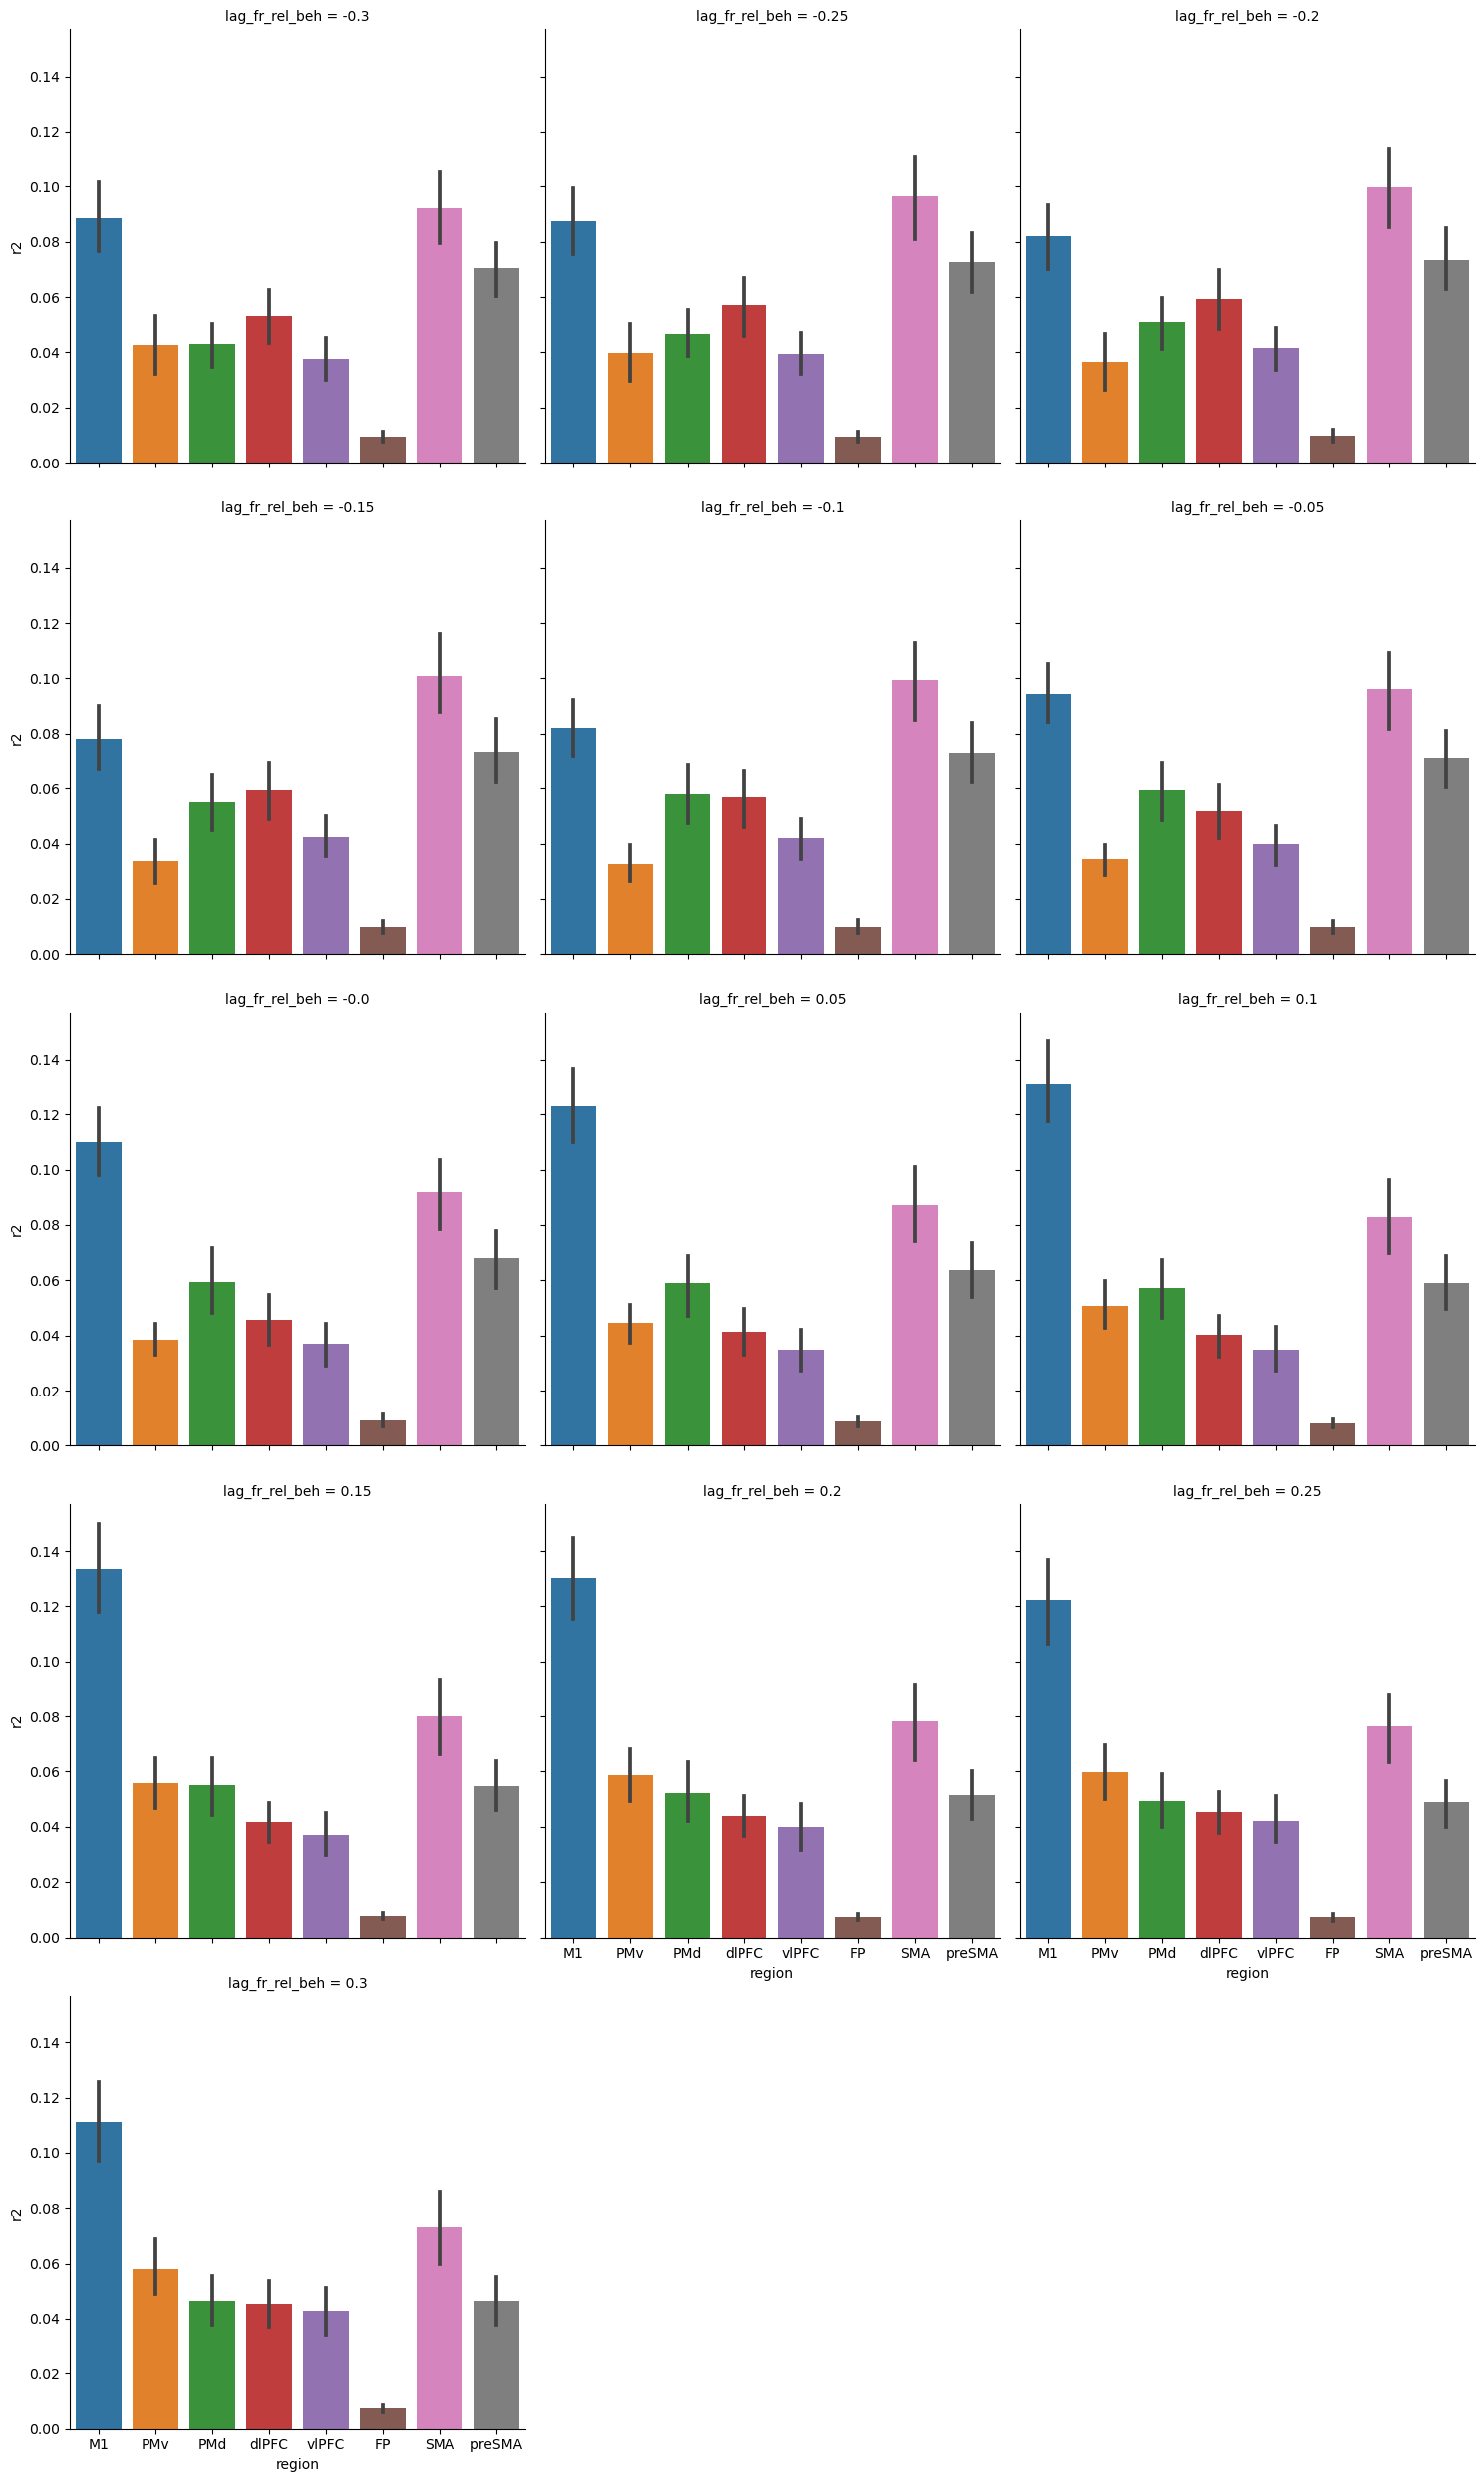

In [40]:
# regions_plot = ["M1_m", "M1_l", "PMv_m", "SMA_a", "dlPFC_a", "preSMA_p", "FP_p"]

dfthis = df_coeff_all
fig = sns.catplot(data=dfthis, x="lag_fr_rel_beh", y="r2", hue="region", kind="point", ci=68, aspect=1.2)
fig.savefig(f"{sdir}/mean_r2_across_lags_all_areas.pdf")


fig = sns.catplot(data=dfthis, col="lag_fr_rel_beh", col_wrap=3, x="region", y="r2", kind="bar", ci=68)
fig.savefig(f"{sdir}/mean_r2_each_time_lag_bars.pdf")

#### Average within time window of interst

In [41]:
lag_wind = [-0.051, 0.051] # to average over these
lag_wind = [-0.101, 0.101] # to average over these
# lag_wind = [-0.251, -0.099] # to average over these
savesuffix=f"lags_{'_'.join([str(x) for x in lag_wind])}"


In [42]:
def _slice_keep_within_time_window(df, lag_wind):
    def F(x):
        return (x["lag_fr_rel_beh"]>=lag_wind[0]) & (x["lag_fr_rel_beh"]<=lag_wind[1])
    df = applyFunctionToAllRows(df, F, newcolname="keep")
    return df_coeff_all[df["keep"]==True].reset_index(drop=True)

    

In [43]:
# extract the dataframe you want to plot
from pythonlib.tools.pandastools import aggregGeneral, applyFunctionToAllRows, convert_to_2d_dataframe

# slice to only those within time window
dfthis = _slice_keep_within_time_window(df_coeff_all, lag_wind)

# mean over lags
dfthis = aggregGeneral(dfthis, group=["site"], values=["r2"], nonnumercols=["region"])


{'r2': ['mean'], 'region': 'first'}


In [51]:
from neuralmonkey.neuralplots.brainschematic import regions_get_ordered_by_x
regions_ordered_by_x = regions_get_ordered_by_x(combined_regions=True)

In [52]:
regions_ordered_by_x

['M1', 'SMA', 'PMd', 'PMv', 'preSMA', 'vlPFC', 'dlPFC', 'FP']

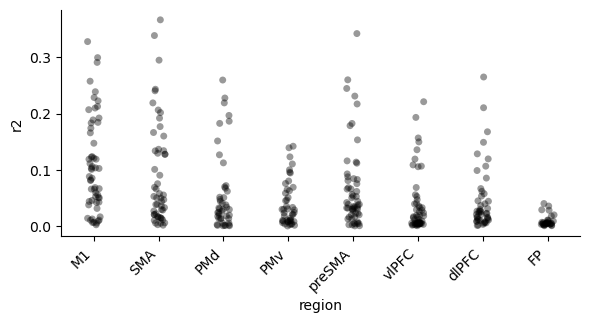

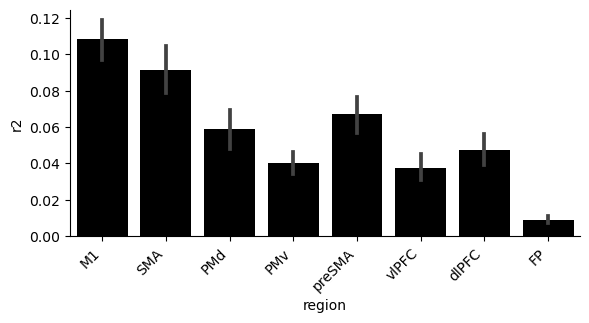

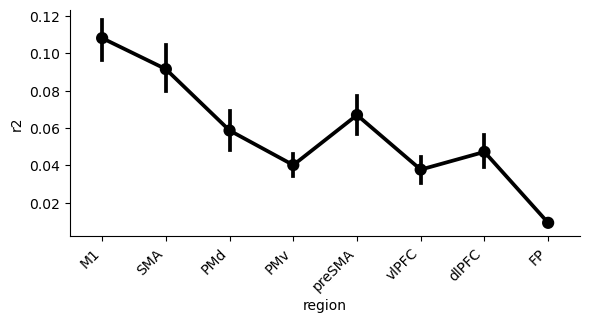

In [53]:
# plot summary
from pythonlib.tools.snstools import rotateLabel

fig = sns.catplot(data=dfthis, x="region", y="r2", aspect=2,  height=3, alpha=0.4, color="k",  
                  order=regions_ordered_by_x)
rotateLabel(fig)
fig.savefig(f"{sdir}/combineregions_{REGION_COMBINED}-{savesuffix}-summary_points.pdf")

fig = sns.catplot(data=dfthis, x="region", y="r2", kind="bar", ci=68, aspect=2, height=3, color="k",
                 order=regions_ordered_by_x)
rotateLabel(fig)
fig.savefig(f"{sdir}/combineregions_{REGION_COMBINED}-{savesuffix}-summary_bar.pdf")

fig = sns.catplot(data=dfthis, x="region", y="r2", kind="point", ci=68, aspect=2, height=3, color="k",
                 order=regions_ordered_by_x)
rotateLabel(fig)
fig.savefig(f"{sdir}/combineregions_{REGION_COMBINED}-{savesuffix}-summary_mean.pdf")


In [56]:
if REGION_COMBINED == False:
    from neuralmonkey.neuralplots.brainschematic import plot_df
    plot_df(dfthis, "r2", savedir=sdir, savesuffix=savesuffix)

### Distribution of velocity vectors

In [ ]:
# Load a single dataset (a single lag)

# dfraw = pd.read_pickle(f"{sdir}/dfraw-lag_fr_rel_beh_-0.0.pkl")
dfraw = pd.read_pickle(f"{sdir}/dfraw-lag_fr_rel_beh_-0.25.pkl")




In [ ]:
fig, ax = plt.subplots()
ax.plot(dfraw["x"], dfraw["y"], 'x', alpha=0.1)

fig 

In [ ]:
# bin angle and take equal n trials
from pythonlib.tools.nptools import bin_values
from pythonlib.tools.nptools import bin_values
from math import pi

dfraw["angle_binned"] = bin_values(dfraw["angle"], valmin = 0, valmax = 2*pi, nbins=8)


# conjunction of angle and speed
dfraw["length_binned"] = bin_values(dfraw["length"], nbins=3)

#

from pythonlib.tools.pandastools import extract_trials_spanning_variable, grouping_append_and_return_inner_items, append_col_with_grp_index, convert_to_2d_dataframe

dfraw = append_col_with_grp_index(dfraw, ["angle_binned", "length_binned"], new_col_name="angle_length_binned", 
                          use_strings=False)


In [ ]:
extract_trials_spanning_variable(dfraw, "angle_length_binned", n_examples=n_examples, method_if_not_enough_examples="all_none")[0]    



In [ ]:
# how many indicies in each grouping?
dfraw["angle_length_binned"].value_counts()

In [ ]:
convert_to_2d_dataframe(dfraw, "angle_binned", "length_binned", True);


In [ ]:
# for i in range(20,30):
#     s = sites[i]
for s in sites_this:
    convert_to_2d_dataframe(dfraw, "angle_binned", "length_binned", True, val_name=f"fr_site_{s}", agg_method="mean");



In [ ]:
##### FIt


In [ ]:
# for each length bin, overlay the angle 





In [ ]:
# Get indices to subspace dataframe optimally, getting
n_examples = 10
list_inds = [0]
while list_inds[0] is not None:
    n_examples = n_examples+10
    list_inds = extract_trials_spanning_variable(dfraw, "angle_length_binned", n_examples=n_examples, method_if_not_enough_examples="all_none")[0]    
list_inds = extract_trials_spanning_variable(dfraw, "angle_length_binned", n_examples=n_examples-10, method_if_not_enough_examples="all_none")[0]    
assert list_inds[0] is not None



In [ ]:
print("using this many exmaples per (angle,speed) bin:", n_examples-10)
print(".. got this many total indices: ", len(list_inds))

In [ ]:
for s in sites:
    fig = sns.pairplot(data=dat, x_vars=["x", "y", "angle", "length"], y_vars=[f"fr_site_{s}"], 
                       markers="x", kind="kde")
    fig.savefig(f"{sdir}/site_{sn.sitegetter_summarytext(s)}.pdf")
    
    assert False



### Nonlinear model (e.g., cosine tuningm)

In [ ]:
x = dfthis["angle_binned"].value_counts()
n = x.iloc[-1] # min n trials


In [ ]:
## Generate a balanced dataset

# Pull out balanced dataset
dfthis = dfraw[dfraw["length_binned"]==1].reset_index(drop=True) # keep length that has all angles

# Get indices to subspace dataframe optimally, getting
varname = "angle_binned"

n_examples = n
list_inds = extract_trials_spanning_variable(dfthis, varname, n_examples=n_examples, method_if_not_enough_examples="fail")[0]
dfthis = dfthis.iloc[list_inds].reset_index(drop=True)


# print the result
dfthis["angle_length_binned"].value_counts()


In [ ]:
sdir = f"{SAVEDIR}/cosine_tuning_lag-0.25"
import os
os.makedirs(sdir)

In [ ]:
# BETTER
PLOTON = False


from scipy.optimize import curve_fit
from math import cos

def f(X, a, b, theta_pref):
    theta = X[0,:]
    return a + b * np.array([cos(theta_pref - t) for t in theta])
    
# def f(X, a, b, theta_pref):
#     theta = X[0,:]
#     speed = X[1,:]
#     return a + b * np.array([cos(theta_pref - t) for t in theta]) + speed
    
# Model it
sites = sn.sitegetter_all()
RES = []
for s in sites:
#     s = 6

    theta = dfraw["angle"]
    speed = dfraw["length"]
    X = np.stack([theta, speed])
    y = dfraw[f"fr_site_{s}"].values

    a0 = 3
    b0 = 3
    theta_0=0
    # f(X, a0, b0, theta_0)
    p0 = [a0, b0, theta_0]
    popt, pcov, infodict, msg, ier = curve_fit(f, X, y, p0, full_output=True)
    assert ier in [1,2,3,4]
    print(msg)

    # Compute R2
    ypred = f(X, *popt)
    SSR = np.sum((y - ypred)**2)
    SST = np.sum((y - np.mean(y))**2)
    R2 = 1 - SSR/SST
    print(popt)
    print("R2 = ", R2)
    
    # COLLECT
    RES.append({
        "site":s,
        "r2":R2,
        "infodict":infodict,
        "popt":popt,
        "pcov":pcov
    })
    if PLOTON:
        FRNAME = f"fr_site_{s}"
        convert_to_2d_dataframe(dfthis, "angle_binned", "length_binned", True, val_name=FRNAME, agg_method="mean");

        xthis = np.linspace(0, 2*pi, 9)[None,:]
        ythis = f(xthis, *popt)

        # sns.relplot(data=dfraw, x="angle", y=FRNAME, hue="length_binned")
        fig = sns.catplot(data=dfraw, x="angle_binned", y=FRNAME, hue="length_binned", kind="point")
        for ax in fig.axes.flatten():
            ax.plot(xthis[0,:], ythis, "--sk")
        fig.savefig(f"{sdir}/site_{sn.sitegetter_summarytext(s)}-angle_length_binned.pdf")

        fig = sns.relplot(data=dfraw, x="angle", y=FRNAME, col="length_binned", alpha=0.1)
        for ax in fig.axes.flatten():
            ax.plot(xthis[0,:], ythis, "--sk")
        #     ax.plot(X[0,:], ypred, "xk",)
        fig.savefig(f"{sdir}/site_{sn.sitegetter_summarytext(s)}-angle_all_length_binned.pdf")



In [ ]:
# PLOT SUMMARY
df_cosine = pd.DataFrame(RES)

def F(x):
    return sn.sitegetter_map_site_to_region(x["site"])
df_cosine = applyFunctionToAllRows(df_cosine, F, "region")

fig = sns.catplot(data=df_cosine, x="region", y="r2")
rotateLabel(fig)
fig = sns.catplot(data=df_cosine, x="region", y="r2", kind="bar", ci=68)
rotateLabel(fig)


In [ ]:
# PLOT SUMMARY
df_cosine = pd.DataFrame(RES)

def F(x):
    return sn.sitegetter_map_site_to_region(x["site"])
df_cosine = applyFunctionToAllRows(df_cosine, F, "region")

fig = sns.catplot(data=df_cosine, x="region", y="r2")
rotateLabel(fig)
fig = sns.catplot(data=df_cosine, x="region", y="r2", kind="bar", ci=68)
rotateLabel(fig)


##### TODO for motor encoding

In [ ]:
1. only look at stroke onset (or better, at segment onset, where segments based on vel minimum)
1b. or extract variable that is its position in the stroke.
2. prune dataset to have same n trials for all bins, conjunction of theta and speed.